# Retrieve CFYs for Cs, Sr and Nd

In [1]:
import sandy

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Data acquisition

In [4]:
nuclides = [551330, 551370, 380900, 601430, 601440, 601450, 601460, 601470, 601480, 601500]

In [5]:
fy = sandy.get_endf6_file("jeff_33", "nfpy", [922350, 942390])
d = sandy.Fy.from_endf6(fy).data.query("MT==459 & E==2.53e-2")
d_33 = d[d.ZAP.isin(nuclides)].assign(LIB="JEFF-3.3")

In [6]:
fy = sandy.get_endf6_file("jeff_311", "nfpy", [922350, 942390])
d = sandy.Fy.from_endf6(fy).data.query("MT==459 & E==2.53e-2")
d_311 = d[d.ZAP.isin(nuclides)].assign(LIB="JEFF-3.1.1")

In [7]:
fy = sandy.get_endf6_file("endfb_71", "nfpy", [922350, 942390])
d = sandy.Fy.from_endf6(fy).data.query("MT==459 & E==2.53e-2")
d_71 = d[d.ZAP.isin(nuclides)].assign(LIB="ENDF/B-VII.1")

In [8]:
fy = sandy.get_endf6_file("endfb_80", "nfpy", [922350, 942390])
d = sandy.Fy.from_endf6(fy).data.query("MT==459 & E==2.53e-2")
d_80 = d[d.ZAP.isin(nuclides)].assign(LIB="ENDF/B-VIII.0")

In [9]:
fy = sandy.get_endf6_file("jendl_40u", "nfpy", [922350, 942390])
d = sandy.Fy.from_endf6(fy).data.query("MT==459 & E==2.53e-2")
d_40u = d[d.ZAP.isin(nuclides)].assign(LIB="JENDL-4.0u")

In [10]:
data = pd.concat([
    d_311,
    d_33,
    d_71,
    d_80,
    d_40u,
], ignore_index=True)

## U-235 data

### Cumulative yield

In [11]:
vals = data.query("ZAM==922350").pivot_table(index="LIB", columns="ZAP", values="FY")
vals.columns = pd.Index(map(sandy.zam.zam2latex, vals.columns), name="ZAP")
vals

ZAP,$^{90}$Sr,$^{133}$Cs,$^{137}$Cs,$^{143}$Nd,$^{144}$Nd,$^{145}$Nd,$^{146}$Nd,$^{147}$Nd,$^{148}$Nd,$^{150}$Nd
LIB,,,,,,,,,,
ENDF/B-VII.1,5.78194e-02,6.69909e-02,6.18832e-02,5.95576e-02,5.49957e-02,3.93337e-02,2.99690e-02,2.24673e-02,1.67354e-02,6.53249e-03
ENDF/B-VIII.0,5.78194e-02,6.69909e-02,6.18832e-02,5.95576e-02,5.49957e-02,3.93337e-02,2.99690e-02,2.24673e-02,1.67354e-02,6.53249e-03
JEFF-3.1.1,5.72900e-02,6.59630e-02,6.22080e-02,5.95410e-02,5.47450e-02,3.94390e-02,2.98660e-02,2.23200e-02,1.68080e-02,6.50740e-03
JEFF-3.3,5.67590e-02,6.65340e-02,6.08970e-02,5.95220e-02,5.47810e-02,3.95600e-02,2.99690e-02,2.24650e-02,1.69270e-02,6.53770e-03
JENDL-4.0u,5.77209e-02,6.68936e-02,6.17528e-02,5.94785e-02,5.49140e-02,3.92725e-02,2.99360e-02,2.24253e-02,1.67062e-02,6.52322e-03


### Absolute error

In [12]:
err = data.query("ZAM==922350").pivot_table(index="LIB", columns="ZAP", values="DFY")
err.columns = pd.Index(map(sandy.zam.zam2latex, err.columns), name="ZAP")
err

ZAP,$^{90}$Sr,$^{133}$Cs,$^{137}$Cs,$^{143}$Nd,$^{144}$Nd,$^{145}$Nd,$^{146}$Nd,$^{147}$Nd,$^{148}$Nd,$^{150}$Nd
LIB,,,,,,,,,,
ENDF/B-VII.1,5.78194e-04,2.34468e-04,3.09416e-04,2.08452e-04,1.92485e-04,1.37668e-04,1.04892e-04,3.14542e-04,5.85740e-05,3.26624e-05
ENDF/B-VIII.0,5.78194e-04,2.34468e-04,3.09416e-04,2.08452e-04,1.92485e-04,1.37668e-04,1.04892e-04,3.14542e-04,5.85740e-05,3.26624e-05
JEFF-3.1.1,1.31920e-03,1.05500e-03,6.93580e-04,8.33760e-04,5.47200e-04,4.34030e-04,2.98670e-04,4.01760e-04,1.17600e-04,6.50750e-05
JEFF-3.3,1.30680e-03,1.19720e-03,6.32840e-04,7.14390e-04,4.92120e-04,3.96460e-04,2.99710e-04,3.81910e-04,1.18300e-04,6.53910e-05
JENDL-4.0u,5.86531e-04,2.53866e-04,3.35754e-04,2.22959e-04,2.09088e-04,1.50678e-04,1.09975e-04,3.17339e-04,6.54533e-05,3.39510e-05


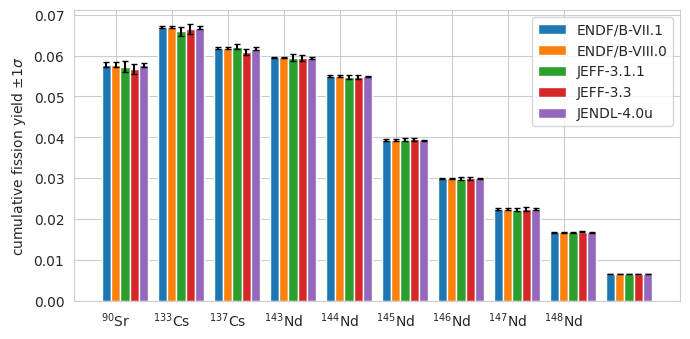

In [13]:
%%capture --no-display
fig, ax = plt.subplots(figsize=(7, 3.5), dpi=100)

step = 1 / (vals.T.columns.size + 1)
for i, LIB in enumerate(vals.T.columns):
    x = np.arange(vals.T[LIB].shape[0])
    ax.bar(data=vals.T[LIB].reset_index(), x=x+i*step, height=LIB, yerr=err.T[LIB], capsize=2, width=step)
ax.legend(labels=vals.T.columns)
ticks = ax.get_xticks()
ax.set_xticklabels(vals.columns.values)
ax.set_xticks(np.arange(9) + step)
ax.set(
    ylabel="cumulative fission yield $\\pm 1\\sigma$",
)
fig.tight_layout();

### Relative error (%)

In [14]:
err / vals * 100

ZAP,$^{90}$Sr,$^{133}$Cs,$^{137}$Cs,$^{143}$Nd,$^{144}$Nd,$^{145}$Nd,$^{146}$Nd,$^{147}$Nd,$^{148}$Nd,$^{150}$Nd
LIB,,,,,,,,,,
ENDF/B-VII.1,1.00000e+00,3.50000e-01,5.00000e-01,3.50001e-01,3.50000e-01,3.50000e-01,3.50002e-01,1.40000e+00,3.50001e-01,4.99999e-01
ENDF/B-VIII.0,1.00000e+00,3.50000e-01,5.00000e-01,3.50001e-01,3.50000e-01,3.50000e-01,3.50002e-01,1.40000e+00,3.50001e-01,4.99999e-01
JEFF-3.1.1,2.30267e+00,1.59938e+00,1.11494e+00,1.40031e+00,9.99543e-01,1.10051e+00,1.00003e+00,1.80000e+00,6.99667e-01,1.00002e+00
JEFF-3.3,2.30237e+00,1.79938e+00,1.03920e+00,1.20021e+00,8.98341e-01,1.00217e+00,1.00007e+00,1.70002e+00,6.98883e-01,1.00021e+00
JENDL-4.0u,1.01615e+00,3.79507e-01,5.43707e-01,3.74856e-01,3.80755e-01,3.83673e-01,3.67367e-01,1.41509e+00,3.91790e-01,5.20464e-01


## Pu-239 data

### Cumulative yield

In [15]:
vals = data.query("ZAM==942390").pivot_table(index="LIB", columns="ZAP", values="FY")
vals.columns = pd.Index(map(sandy.zam.zam2latex, vals.columns), name="ZAP")
vals

ZAP,$^{90}$Sr,$^{133}$Cs,$^{137}$Cs,$^{143}$Nd,$^{144}$Nd,$^{145}$Nd,$^{146}$Nd,$^{147}$Nd,$^{148}$Nd,$^{150}$Nd
LIB,,,,,,,,,,
ENDF/B-VII.1,2.10408e-02,7.01629e-02,6.60739e-02,4.41321e-02,3.73974e-02,2.98627e-02,2.45812e-02,2.00296e-02,1.64209e-02,9.66295e-03
ENDF/B-VIII.0,2.10408e-02,7.01629e-02,6.60739e-02,4.41321e-02,3.73974e-02,2.98627e-02,2.45812e-02,2.00296e-02,1.64209e-02,9.66295e-03
JEFF-3.1.1,2.01330e-02,6.99480e-02,6.58810e-02,4.47560e-02,3.75550e-02,3.03570e-02,2.49630e-02,2.04360e-02,1.65830e-02,9.74630e-03
JEFF-3.3,2.07680e-02,6.84400e-02,6.57960e-02,4.45030e-02,3.76250e-02,3.04720e-02,2.52890e-02,2.07140e-02,1.68500e-02,9.75350e-03
JENDL-4.0u,2.10320e-02,7.01558e-02,6.60478e-02,4.41279e-02,3.73922e-02,2.98578e-02,2.45799e-02,2.00259e-02,1.64174e-02,9.66187e-03


### Absolute error

In [16]:
err = data.query("ZAM==942390").pivot_table(index="LIB", columns="ZAP", values="DFY")
err.columns = pd.Index(map(sandy.zam.zam2latex, err.columns), name="ZAP")
err

ZAP,$^{90}$Sr,$^{133}$Cs,$^{137}$Cs,$^{143}$Nd,$^{144}$Nd,$^{145}$Nd,$^{146}$Nd,$^{147}$Nd,$^{148}$Nd,$^{150}$Nd
LIB,,,,,,,,,,
ENDF/B-VII.1,4.20816e-04,3.50815e-04,3.30369e-04,2.20660e-04,1.30891e-04,1.04520e-04,8.60340e-05,5.60828e-04,8.21047e-05,3.38203e-05
ENDF/B-VIII.0,4.20816e-04,3.50815e-04,3.30369e-04,2.20660e-04,1.30891e-04,1.04520e-04,8.60340e-05,5.60828e-04,8.21047e-05,3.38203e-05
JEFF-3.1.1,5.43960e-04,1.25890e-03,8.02620e-04,4.92380e-04,3.00440e-04,3.33940e-04,2.49630e-04,3.88290e-04,1.65830e-04,1.26740e-04
JEFF-3.3,5.81820e-04,1.43720e-03,8.01810e-04,5.34100e-04,3.38490e-04,3.04810e-04,2.27600e-04,4.55620e-04,1.51560e-04,1.36560e-04
JENDL-4.0u,4.20908e-04,3.50886e-04,3.31397e-04,2.20700e-04,1.30995e-04,1.04636e-04,8.60441e-05,5.60840e-04,8.21794e-05,3.38376e-05


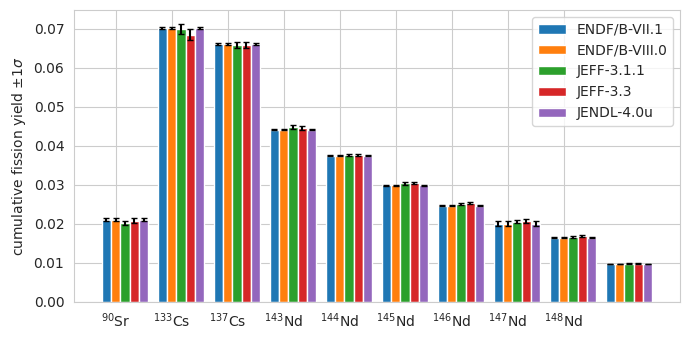

In [17]:
%%capture --no-display
fig, ax = plt.subplots(figsize=(7, 3.5), dpi=100)

step = 1 / (vals.T.columns.size + 1)
for i, LIB in enumerate(vals.T.columns):
    x = np.arange(vals.T[LIB].shape[0])
    ax.bar(data=vals.T[LIB].reset_index(), x=x+i*step, height=LIB, yerr=err.T[LIB], capsize=2, width=step)
ax.legend(labels=vals.T.columns)
ticks = ax.get_xticks()
ax.set_xticklabels(vals.columns.values)
ax.set_xticks(np.arange(9) + step)
ax.set(
    ylabel="cumulative fission yield $\\pm 1\\sigma$",
)
fig.tight_layout();

### Relative error (%)

In [18]:
err / vals * 100

ZAP,$^{90}$Sr,$^{133}$Cs,$^{137}$Cs,$^{143}$Nd,$^{144}$Nd,$^{145}$Nd,$^{146}$Nd,$^{147}$Nd,$^{148}$Nd,$^{150}$Nd
LIB,,,,,,,,,,
ENDF/B-VII.1,2.00000e+00,5.00001e-01,4.99999e-01,4.99999e-01,3.50000e-01,3.50002e-01,3.49999e-01,2.80000e+00,5.00001e-01,3.50000e-01
ENDF/B-VIII.0,2.00000e+00,5.00001e-01,4.99999e-01,4.99999e-01,3.50000e-01,3.50002e-01,3.49999e-01,2.80000e+00,5.00001e-01,3.50000e-01
JEFF-3.1.1,2.70183e+00,1.79977e+00,1.21829e+00,1.10014e+00,8.00000e-01,1.10004e+00,1.00000e+00,1.90003e+00,1.00000e+00,1.30039e+00
JEFF-3.3,2.80152e+00,2.09994e+00,1.21863e+00,1.20014e+00,8.99641e-01,1.00030e+00,8.99996e-01,2.19958e+00,8.99466e-01,1.40011e+00
JENDL-4.0u,2.00127e+00,5.00153e-01,5.01753e-01,5.00137e-01,3.50327e-01,3.50448e-01,3.50059e-01,2.80057e+00,5.00563e-01,3.50218e-01
